<a href="https://colab.research.google.com/github/bjentwistle/PythonFundamentals/blob/main/Projects/Final_Sea_Level_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Sea Level Project - correlation between time data and sea level rise and future predictions.
---

### Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.
https://datahub.io/core/sea-level-rise

The data describes annual sea levels from 1880 to 2013.  Measures are adjusted using two standards: Commonwealth Scientific and Industrial Research Organisation(CSIRO) and National Oceanic and Atmospheric Administration (NOAA)  

Raw Data file:  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv

For this exercise:
*  import the pandas library
*  import the numpy library
*  read the csv dataset containing data on sea-levels from the year 1880 to 2013 into a dataframe (df)
*  use df.head() and df.info() to inspect the data and the column data types



In [11]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv"
sea_levels = pd.read_csv(url)

#sea_levels.head()
sea_levels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


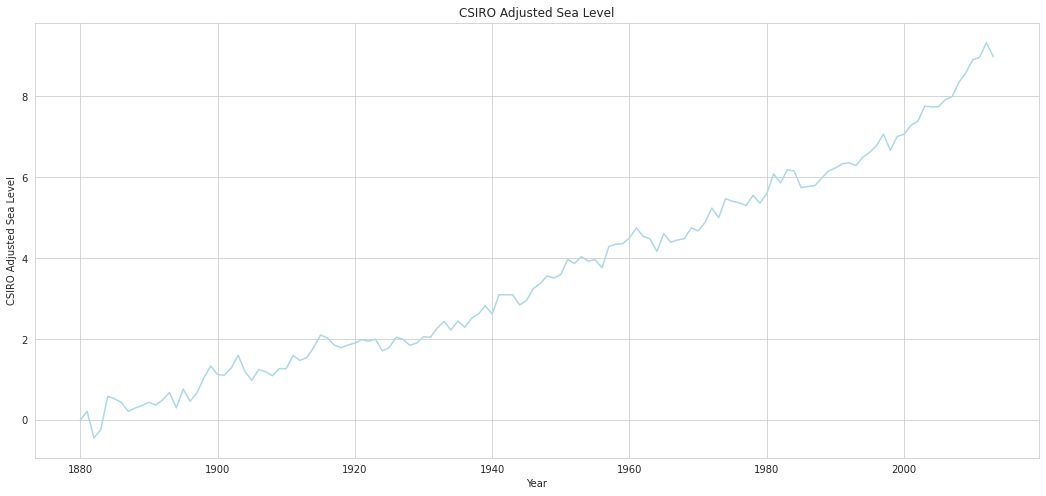

In [10]:
import seaborn as sns
from scipy.stats import linregress
import matplotlib.pyplot as plt

def display_lineplot(df, column):
  #create a subset of the df using only the net_per_10K columns and find their means.
  data = df
  
  #plot the chart of the data means and get labels from the years column
  plt.figure(figsize=(18, 8))
  chart = sns.lineplot(data=data,y = column, x="Year", color='lightblue')
  #make a lables list from the keys of your subset df.
  # labels = df.index
  #chart.set_xticklabels( rotation=45)
  plt.title("CSIRO Adjusted Sea Level over time")
  sns.set_style("whitegrid")

display_lineplot(sea_levels, "CSIRO Adjusted Sea Level")

### Then
---
1.  Calculate some statistics on the level array, eg:
*  mean
*  standard deviation
*  total 

2.  Use the fact that the arrays are aligned (e.g. the first number in the level array is linked to the first year in the year array and display:

*  the year with the biggest rise in level
*  the year with the lowest rise in level

*(**Hint**:  to do this you can use a new numpy function np.where() )*
 ```
np.where(array == value_to_find)
```
*There is some reference material [here](https://thispointer.com/find-the-index-of-a-value-in-numpy-array/)*

**Note**: ```np.where(...)``` will return a tuple containing all indexes where that value was found.  You can print all, or you can print the first value (it is likely that there will only be one in this case) using [0][0].  *With the correct code you should get an answer of 2012*


3.  Calculate the Pearson product-moment correlation coefficient between year and the rise in sea level.  (*Expected output:  0.98 when rounded to 2 decimal places*)

In [12]:
#Create numpy arrays for the sea levels by CSIRO and the years.
sea_levels_array = sea_levels['CSIRO Adjusted Sea Level'].to_numpy(np.float32)
years_array = sea_levels['Year'].to_numpy(np.float16)


#Calculate some statistics for sea levels - mean and stnadard deviation.
mean_sea_levels = sea_levels_array.mean()
stand_dev = np.std(sea_levels_array)
print("Average increase:", mean_sea_levels)
print("Sandard Deviation:", stand_dev)

#Work out which year had the maximun increase in sea levels and print that year.
max_increase = sea_levels_array.max()
year_max = np.where(sea_levels_array == max_increase)
print(int(years_array[year_max]),"had the maximun sea level increase of ", max_increase)

#Work out which year had the minimum increase in sea levels and print that year.
min_increase = sea_levels_array.min()
year_min = np.where(sea_levels_array == min_increase)
print(int(years_array[year_min]),"had the minimum sea level increase of ", min_increase)

#Work out the Pearson Correlation Coefficient for the sea levels realted to the year.
corr_coeff = np.corrcoef(years_array, sea_levels_array)
print("The correlation coefficiant between time and levels = ", corr_coeff[1,0])

Average increase: 3.650341
Sandard Deviation: 2.4763997
2012 had the maximun sea level increase of  9.326772
1882 had the minimum sea level increase of  -0.44094488
The correlation coefficiant between time and levels =  0.9847571304507764


In [ ]:
#Linear regression to get the slope and intercept of the data so I can use it to make a prediction 
#of sea levels in the future.



# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer: 

## What caused you the most difficulty?

Your answer: 